In [3]:
import numpy as np
import pandas as pd
import seaborn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('../../data/Processed_Data/leakage_fourier_transform_results.csv')

In [5]:
df.head()

,AccountNumber,-30.0,-29.880478087649404,-29.76190476190476,-29.644268774703555,-29.527559055118108,-29.41176470588235,-29.296875,-29.182879377431906,-29.069767441860463,...,28.957528957528957,29.069767441860463,29.182879377431906,29.296875,29.41176470588235,29.527559055118108,29.644268774703555,29.76190476190476,29.880478087649404,30.0
0,0250780-511949,54.144652,359.149105,298.364118,331.425118,221.504635,221.775855,633.941601,219.307955,357.391871,...,632.977859,357.391871,219.307955,633.941601,221.775855,221.504635,331.425118,298.364118,359.149105,54.144652
1,0751760-445274,85.057561,227.515977,33.640016,109.376999,64.951766,141.108078,117.742658,100.385297,54.427729,...,19.696296,54.427729,100.385297,117.742658,141.108078,64.951766,109.376999,33.640016,227.515977,85.057561
2,0800240-294760,310.167485,105.721501,380.204289,207.893514,334.453145,199.357422,68.361327,210.130383,113.819542,...,38.367786,113.819542,210.130383,68.361327,199.357422,334.453145,207.893514,380.204289,105.721501,310.167485
3,1000320-20089,176.736536,133.990707,354.854145,245.003081,240.844651,87.987481,425.393463,241.850337,348.137472,...,188.652146,348.137472,241.850337,425.393463,87.987481,240.844651,245.003081,354.854145,133.990707,176.736536
4,1202220-661732,139.259859,382.076849,297.113532,176.389503,531.650005,359.546625,352.003541,192.067589,280.806921,...,286.250885,280.806921,192.067589,352.003541,359.546625,531.650005,176.389503,297.113532,382.076849,139.259859


In [73]:
print(pd. __version__) 

df_abbrev = df.iloc[:, 1:7001]
df_abbrev.dtypes

## df_abbrev.astype('float4)
## df_conv = df[cols].convert_objects(convert_numeric=True)
## df_abbrev.describe()


2.0.3


-30.0                  float64
-29.880478087649404    float64
-29.76190476190476     float64
-29.644268774703555    float64
-29.527559055118108    float64
                        ...   
29.41176470588235      float64
29.527559055118108     float64
29.644268774703555     float64
29.76190476190476      float64
29.880478087649404     float64
Length: 7000, dtype: object

In [78]:
#Normalize data for PCA
#Replace standard deviation

std_df = df_abbrev.std(skipna=True, numeric_only=True)
for i in range(len(std_df)):
    if std_df[i] == 0:
        std_df[i] = 1

In [80]:
normal_df=(df_abbrev-df_abbrev.mean())/std_df
normal_df

,-30.0,-29.880478087649404,-29.76190476190476,-29.644268774703555,-29.527559055118108,-29.41176470588235,-29.296875,-29.182879377431906,-29.069767441860463,-28.957528957528957,...,28.846153846153847,28.957528957528957,29.069767441860463,29.182879377431906,29.296875,29.41176470588235,29.527559055118108,29.644268774703555,29.76190476190476,29.880478087649404
0,-0.947201,0.054604,-0.509333,0.451580,-0.602482,-0.504284,1.139041,-0.762037,0.464985,1.020594,...,0.355195,1.020594,0.464985,-0.762037,1.139041,-0.504284,-0.602482,0.451580,-0.509333,0.054604
1,-0.856736,-0.540073,-1.630023,-0.826404,-1.066813,-0.774423,-0.946931,-1.283240,-1.402206,-1.336856,...,-1.018572,-1.336856,-1.402206,-1.283240,-0.946931,-0.774423,-1.066813,-0.826404,-1.630023,-0.540073
2,-0.197959,-1.090302,-0.162869,-0.259399,-0.267480,-0.579359,-1.146483,-0.802260,-1.036170,-1.265083,...,-0.913969,-1.265083,-1.036170,-0.802260,-1.146483,-0.579359,-0.267480,-0.259399,-0.162869,-1.090302
3,-0.588440,-0.962590,-0.270187,-0.045817,-0.545120,-0.952313,0.296293,-0.663241,0.407950,-0.687391,...,-0.033841,-0.687391,0.407950,-0.663241,0.296293,-0.952313,-0.545120,-0.045817,-0.270187,-0.962590
4,-0.698114,0.158185,-0.514627,-0.440718,0.317401,-0.042919,-0.000278,-0.881424,-0.007014,-0.312222,...,-0.359683,-0.312222,-0.007014,-0.881424,-0.000278,-0.042919,0.317401,-0.440718,-0.514627,0.158185
5,1.011231,1.873936,1.243476,-0.603943,2.373882,1.511326,1.633436,1.522159,1.765970,-0.220740,...,2.479159,-0.220740,1.765970,1.522159,1.633436,1.511326,2.373882,-0.603943,1.243476,1.873936
6,0.205929,-0.688485,0.504631,0.593664,-0.464843,-1.013026,-0.813777,-0.467021,-0.090384,0.939981,...,0.330652,0.939981,-0.090384,-0.467021,-0.813777,-1.013026,-0.464843,0.593664,0.504631,-0.688485
7,0.099722,1.292639,-0.608256,2.942611,1.896161,1.064641,1.936829,2.234556,-1.079215,2.242056,...,1.673119,2.242056,-1.079215,2.234556,1.936829,1.064641,1.896161,2.942611,-0.608256,1.292639
8,0.192859,1.790444,1.985609,-0.211173,0.545108,1.206126,-0.423073,0.266916,1.003056,0.174655,...,-0.034252,0.174655,1.003056,0.266916,-0.423073,1.206126,0.545108,-0.211173,1.985609,1.790444
9,-0.308530,-0.737407,-0.924951,0.905240,-0.899115,-0.683856,-0.801029,-0.018386,-0.513731,0.072083,...,-0.655136,0.072083,-0.513731,-0.018386,-0.801029,-0.683856,-0.899115,0.905240,-0.924951,-0.737407


In [90]:
normal_df.describe()

,-30.0,-29.880478087649404,-29.76190476190476,-29.644268774703555,-29.527559055118108,-29.41176470588235,-29.296875,-29.182879377431906,-29.069767441860463,-28.957528957528957,...,28.846153846153847,28.957528957528957,29.069767441860463,29.182879377431906,29.296875,29.41176470588235,29.527559055118108,29.644268774703555,29.76190476190476,29.880478087649404
count,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,...,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01
mean,2.616954e-16,-1.625684e-16,1.665335e-16,4.361590e-17,6.344132e-17,2.230359e-16,7.930164e-17,-2.517827e-16,-4.758099e-17,-7.137148e-17,...,-7.930164e-18,-7.137148e-17,-4.758099e-17,-2.517827e-16,7.930164e-17,2.230359e-16,6.344132e-17,4.361590e-17,1.665335e-16,-1.625684e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.472011e-01,-1.090302e+00,-1.630023e+00,-8.264045e-01,-1.066813e+00,-1.013026e+00,-1.146483e+00,-1.283240e+00,-1.407254e+00,-1.336856e+00,...,-1.018572e+00,-1.336856e+00,-1.407254e+00,-1.283240e+00,-1.146483e+00,-1.013026e+00,-1.066813e+00,-8.264045e-01,-1.630023e+00,-1.090302e+00
25%,-5.566620e-01,-7.251767e-01,-5.848491e-01,-5.992571e-01,-5.250506e-01,-7.517812e-01,-8.105902e-01,-7.373383e-01,-9.055600e-01,-7.132220e-01,...,-6.728164e-01,-7.132220e-01,-9.055600e-01,-7.373383e-01,-8.105902e-01,-7.517812e-01,-5.250506e-01,-5.992571e-01,-5.848491e-01,-7.251767e-01
50%,-2.532444e-01,-3.471687e-01,-3.698765e-01,-3.500584e-01,-3.755052e-01,-3.734829e-01,-2.976068e-01,-2.357843e-01,-4.869881e-02,-8.885170e-02,...,-1.164263e-01,-8.885170e-02,-4.869881e-02,-2.357843e-01,-2.976068e-01,-3.734829e-01,-3.755052e-01,-3.500584e-01,-3.698765e-01,-3.471687e-01
75%,1.695747e-01,3.453494e-01,7.866856e-01,3.272306e-01,2.099681e-01,8.012590e-01,5.704073e-01,2.720606e-01,8.043713e-01,7.086127e-01,...,2.468501e-01,7.086127e-01,8.043713e-01,2.720606e-01,5.704073e-01,8.012590e-01,2.099681e-01,3.272306e-01,7.866856e-01,3.453494e-01
max,2.992746e+00,1.873936e+00,1.985609e+00,2.942611e+00,2.373882e+00,1.909917e+00,1.936829e+00,2.234556e+00,1.765970e+00,2.242056e+00,...,2.479159e+00,2.242056e+00,1.765970e+00,2.234556e+00,1.936829e+00,1.909917e+00,2.373882e+00,2.942611e+00,1.985609e+00,1.873936e+00


In [91]:
#Compute PCA
cov_df = normal_df.cov()
evals, evecs = np.linalg.eig(cov_df)
evecs = evecs.transpose()

In [92]:
evals

array([ 3.17451951e+03+0.00000000e+00j,  9.12478996e+02+0.00000000e+00j,
        6.72356205e+02+0.00000000e+00j, ...,
        1.33777388e-33-1.53198105e-32j, -6.57160087e-33+0.00000000e+00j,
        1.98353737e-32+0.00000000e+00j])

In [108]:
#Sort eigenvectors by eigenvalues in decreasing order
sort_evecs = []
for i in range(len(evals)):
    sort_evecs.append(np.append(evals[i],evecs[i]))
sort_evecs = sorted(sort_evecs,key=lambda x : -x[0])
sort_evals = [sort_evecs[i][0] for i in range(len(sort_evecs))]
sort_evecs = [sort_evecs[i][1:] for i in range(len(sort_evecs))]

sort_evals = np.array(sort_evals)
sort_evecs = np.array(sort_evecs)
sort_evecs

array([[-8.78960057e-03+0.j        , -1.14739496e-02+0.j        ,
        -1.27820185e-02+0.j        , ..., -9.81119121e-04+0.j        ,
        -1.27820185e-02+0.j        , -1.14739496e-02+0.j        ],
       [-8.17928851e-03+0.j        , -1.41460379e-02+0.j        ,
        -8.46017818e-03+0.j        , ...,  2.32139629e-03+0.j        ,
        -8.46017818e-03+0.j        , -1.41460379e-02+0.j        ],
       [ 2.15492457e-02+0.j        , -1.72342330e-04+0.j        ,
         3.60254829e-03+0.j        , ...,  1.59685485e-02+0.j        ,
         3.60254829e-03+0.j        , -1.72342330e-04+0.j        ],
       ...,
       [-6.57507292e-05+0.00037962j,  1.93120597e-03-0.0002927j ,
         1.48157072e-03-0.00075137j, ..., -4.30336546e-03-0.01024368j,
         1.56310386e-03-0.00065221j,  1.88755747e-03-0.00034579j],
       [-7.32629749e-04-0.00035738j, -5.96204027e-03+0.00339297j,
         1.24260687e-02-0.00071822j, ...,  2.58048512e-03+0.00288006j,
         1.22190751e-02-0.00090633j

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'Importance Scores of Component Axes from PCA'}, xlabel='Component (Eigenvector)', ylabel='Importance Score (Eigenvalue)'>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


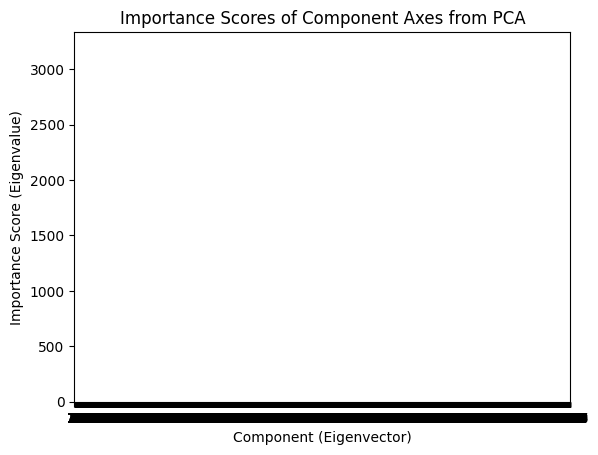

In [101]:
plt.title("Importance Scores of Component Axes from PCA")
graph_evals = pd.DataFrame([[i,sort_evals[i]] for i in range(len(sort_evals))],columns=["Component (Eigenvector)","Importance Score (Eigenvalue)"])

## ASK ABOUT THIS
seaborn.barplot(data=graph_evals,x="Component (Eigenvector)",y="Importance Score (Eigenvalue)")

In [102]:
sort_evals

array([ 3.17451951e+03+0.00000000e+00j,  9.12478996e+02+0.00000000e+00j,
        6.72356205e+02+0.00000000e+00j, ...,
       -2.64596933e-13-3.07129290e-13j, -3.77934275e-13+1.10224265e-13j,
       -3.77934275e-13-1.10224265e-13j])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


<Axes: title={'center': 'Axes of Components 0 and 1'}, xlabel='Component 0 Axis', ylabel='Component 1 Axis'>

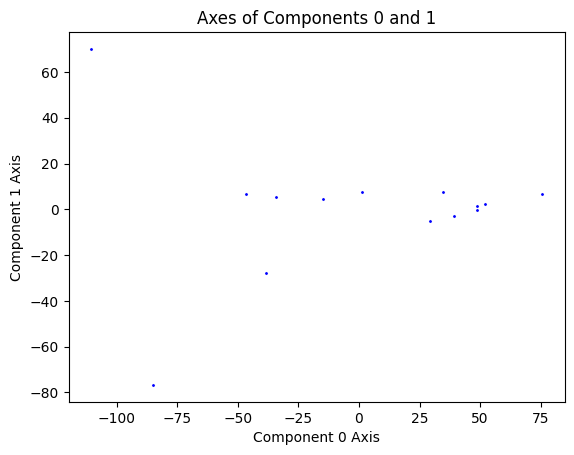

In [111]:
#Project data points onto eigenvectors
pc_array = np.array([np.dot(normal_df, sort_evecs[i]) for i in range(len(sort_evecs))])

#Transpose so columns correspond to eigenvector directions
pc_array = pc_array.transpose()

#Graph main eigenvectors 0 and 1
plt.title("Axes of Components 0 and 1")
plt.xlabel("Component 0 Axis")
plt.ylabel('Component 1 Axis')
graph_df = pd.DataFrame(data=pc_array)
seaborn.scatterplot(data=graph_df,x=0,y=1,s=5,color='b')
## seaborn.scatterplot(data=df,x='',y='DailyRate')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


TypeError: a must be an array of real numbers

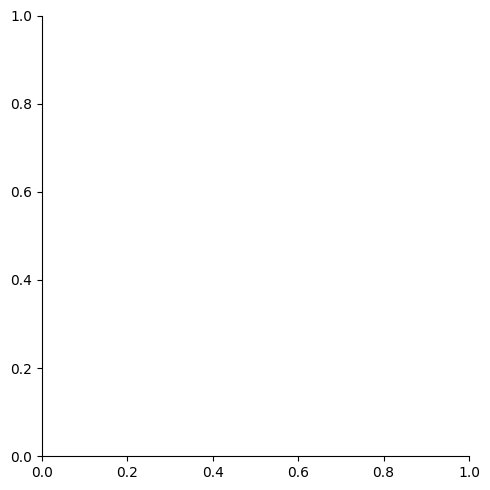

In [112]:
## ASK ABOUT THIS
seaborn.displot(data=graph_df,x=4)

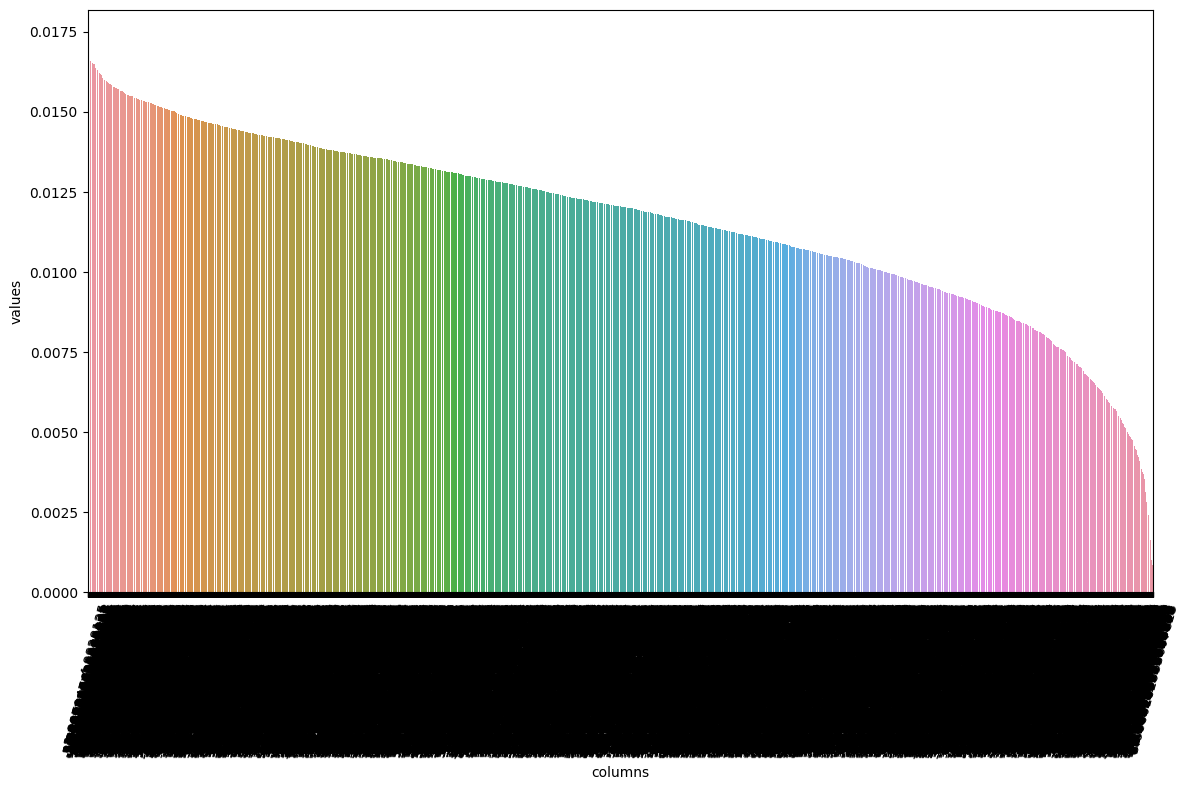

In [116]:
#Weights on variables in component 0
N=0
component_df = pd.DataFrame(np.array([normal_df.columns, np.abs(sort_evecs[N])]).transpose(),columns=["columns","values"])
sort_component_df = component_df.sort_values(by="values",ascending=False)[:]

#Plot
plt.figure(figsize=(12,8))
plot = seaborn.barplot(data=sort_component_df,x="columns",y="values")
plot.set_xticklabels(sort_component_df["columns"], rotation=75)
plt.tight_layout()
plt.show()

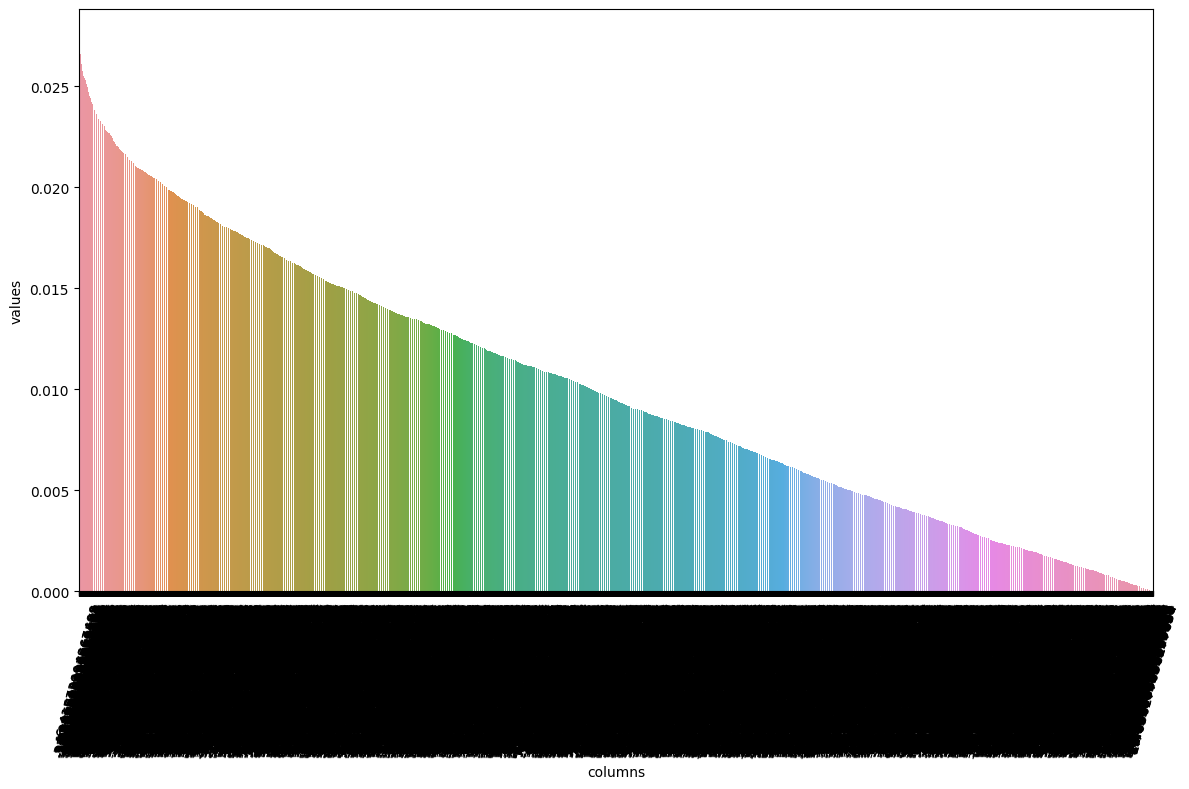

In [113]:
#Weights on variables in component 1
N=1
component_df = pd.DataFrame(np.array([normal_df.columns, np.abs(sort_evecs[N])]).transpose(),columns=["columns","values"])
sort_component_df = component_df.sort_values(by="values",ascending=False)[:]

#Plot
plt.figure(figsize=(12,8))
plot = seaborn.barplot(data=sort_component_df,x="columns",y="values")
plot.set_xticklabels(sort_component_df["columns"], rotation=75)
plt.tight_layout()
plt.show()

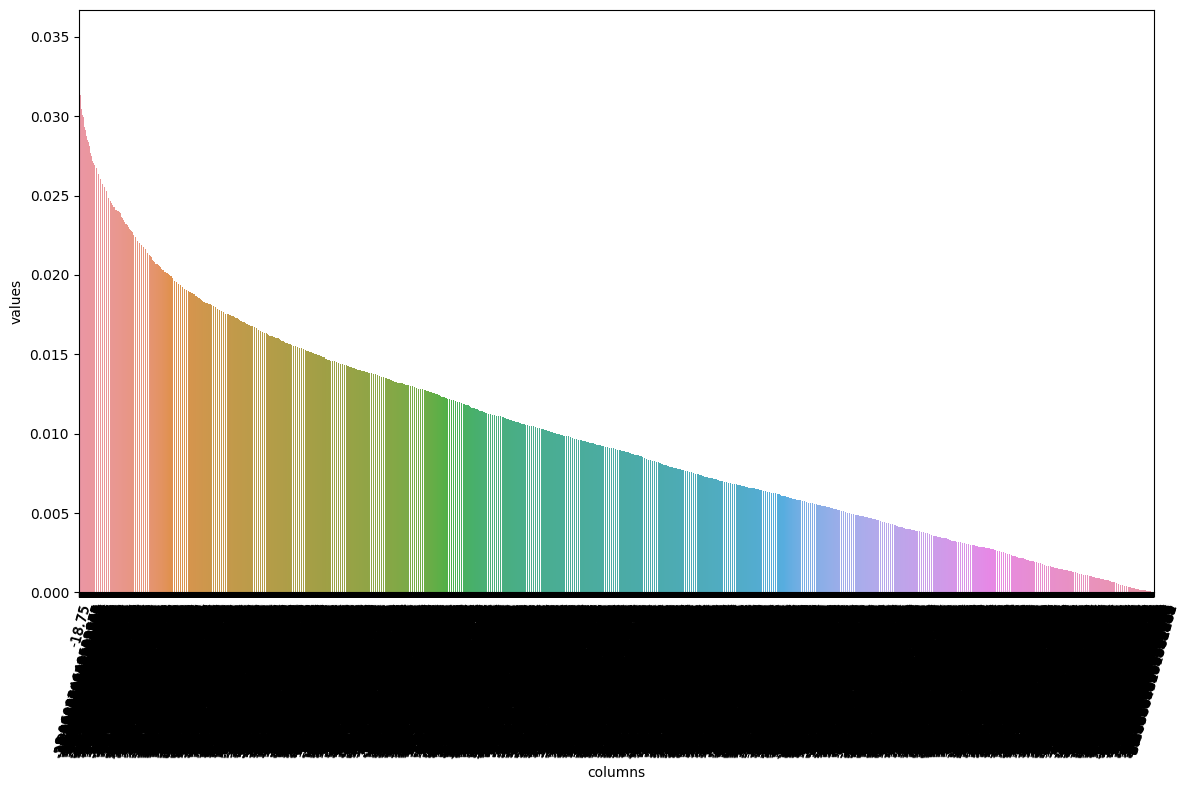

In [117]:
#Weights on variables in component 2
N=2
component_df = pd.DataFrame(np.array([normal_df.columns, np.abs(sort_evecs[N])]).transpose(),columns=["columns","values"])
sort_component_df = component_df.sort_values(by="values",ascending=False)[:]

#Plot
plt.figure(figsize=(12,8))
plot = seaborn.barplot(data=sort_component_df,x="columns",y="values")
plot.set_xticklabels(sort_component_df["columns"], rotation=75)
plt.tight_layout()
plt.show()

In [115]:
#Determine optimal number of clusters for KMeans
MAX_CLUSTERS = 10
inertia = []
d_inertia = []
for i in range(1,MAX_CLUSTERS):
    kmeans = KMeans(init="k-means++", n_clusters=i, n_init=5)
    kmeans.fit(graph_df)
    inertia.append([i,kmeans.inertia_])
    if (i > 1):
        d_inertia.append([i, inertia[i-2][1] - inertia[i-1][1]])
    else:
        d_inertia.append([1, 0])
    
inertia = pd.DataFrame(inertia)
d_inertia = pd.DataFrame(d_inertia)
p = seaborn.scatterplot(data=inertia,x=0,y=1,label='Inertia')
seaborn.scatterplot(data=d_inertia,x=0,y=1,label='Relative decrease in inertia')
plt.legend()
p.set_ylim(0,np.max(inertia[1])*1.1)
p

ValueError: Complex data not supported
                    0                    1                    2     \
0    39.418695+0.000000j  -2.818051+0.000000j  -7.918257+0.000000j   
1    75.526222+0.000000j   6.812357+0.000000j -10.482321+0.000000j   
2    29.520322+0.000000j  -5.149376+0.000000j  -9.482247+0.000000j   
3    51.841089+0.000000j   2.277106+0.000000j  -8.932248+0.000000j   
4    34.746951+0.000000j   7.570906+0.000000j  -2.525703+0.000000j   
5   -85.117548+0.000000j -76.725615+0.000000j -32.935334+0.000000j   
6   1.1603540+0.0000000j   7.773361+0.000000j  17.426411+0.000000j   
7   -46.487318+0.000000j   6.653742+0.000000j  43.894891+0.000000j   
8   -38.355931+0.000000j -27.683232+0.000000j  12.773627+0.000000j   
9    48.881624+0.000000j   1.625481+0.000000j  -9.078520+0.000000j   
10  -14.988277+0.000000j   4.398039+0.000000j   2.787841+0.000000j   
11  -34.188303+0.000000j   5.362993+0.000000j  55.314113+0.000000j   
12   48.593443+0.000000j  -0.170552+0.000000j -10.069863+0.000000j   
13 -110.551325+0.000000j  70.072841+0.000000j -40.772389+0.000000j   

                   3                    4                    5     \
0   -1.227877+0.000000j   1.013258+0.000000j   5.164485+0.000000j   
1   -5.187695+0.000000j  -0.368101+0.000000j   6.127304+0.000000j   
2    0.929774+0.000000j   1.333205+0.000000j   1.731232+0.000000j   
3   -3.232464+0.000000j  -0.139786+0.000000j   6.132610+0.000000j   
4   -2.513285+0.000000j  -0.418295+0.000000j   2.388500+0.000000j   
5  -29.348663+0.000000j  -4.762144+0.000000j   3.772984+0.000000j   
6   -2.799173+0.000000j   1.535790+0.000000j  -3.864934+0.000000j   
7  -22.434611+0.000000j  56.016446+0.000000j   9.303638+0.000000j   
8   78.256801+0.000000j   3.546083+0.000000j   7.683285+0.000000j   
9    1.494863+0.000000j  -0.706366+0.000000j   1.542138+0.000000j   
10   1.704890+0.000000j   0.370438+0.000000j -62.851028+0.000000j   
11 -16.406527+0.000000j -52.231692+0.000000j   8.730654+0.000000j   
12  -2.466043+0.000000j  -0.100770+0.000000j   4.892638+0.000000j   
13   3.230010+0.000000j  -5.088066+0.000000j   9.246495+0.000000j   

                   6                    7                    8     \
0   -6.832226+0.000000j   1.737934+0.000000j  24.513131+0.000000j   
1   -2.559701+0.000000j  -6.595314+0.000000j  -0.870281+0.000000j   
2   -5.972979+0.000000j  37.976637+0.000000j -14.902463+0.000000j   
3   -4.328691+0.000000j  -2.398877+0.000000j   3.906269+0.000000j   
4    2.485550+0.000000j -20.404619+0.000000j -24.784494+0.000000j   
5    3.244317+0.000000j  -3.957481+0.000000j  -0.767153+0.000000j   
6   55.161506+0.000000j   4.374631+0.000000j   3.669041+0.000000j   
7  -11.184108+0.000000j  -0.752145+0.000000j   0.117491+0.000000j   
8   -2.447734+0.000000j  -2.816801+0.000000j  -0.033960+0.000000j   
9   -2.359044+0.000000j  -7.119882+0.000000j  -0.092901+0.000000j   
10  -8.590491+0.000000j  -1.435933+0.000000j   1.415615+0.000000j   
11 -10.971301+0.000000j   0.784321+0.000000j   0.478497+0.000000j   
12  -4.004303+0.000000j   0.486612+0.000000j   6.204833+0.000000j   
13  -1.640795+0.000000j   0.120917+0.000000j   1.146376+0.000000j   

                   9     ...                        6990  \
0   19.949004+0.000000j  ...  7.224683e-16+4.206123e-15j   
1   -2.290618+0.000000j  ...  1.763937e-15+1.495714e-15j   
2    2.868288+0.000000j  ... -3.458964e-17+3.126956e-15j   
3   -2.818602+0.000000j  ... -2.681349e-15-1.905183e-15j   
4   16.227989+0.000000j  ...  3.259347e-15-1.624356e-15j   
5   -0.922902+0.000000j  ... -2.509924e-16-3.061149e-15j   
6   -0.239727+0.000000j  ...  1.139525e-15+5.788279e-16j   
7   -1.837910+0.000000j  ... -3.596545e-15-1.614497e-15j   
8   -0.305138+0.000000j  ... -1.998699e-15-1.692029e-15j   
9  -23.160301+0.000000j  ...  1.377366e-15-1.328900e-15j   
10   0.198067+0.000000j  ...  4.948887e-16-1.137645e-15j   
11  -1.161392+0.000000j  ... -2.701121e-16+1.555079e-15j   
12  -5.750511+0.000000j  ...  3.646615e-15+1.632841e-16j   
13  -0.756246+0.000000j  ...  2.209395e-15+3.275727e-15j   

                          6991                        6992  \
0   7.224683e-16-4.206123e-15j  2.877547e-16+3.992916e-16j   
1   1.763937e-15-1.495714e-15j  2.314285e-15-3.315912e-15j   
2  -3.458964e-17-3.126956e-15j  2.697781e-15-3.138783e-15j   
3  -2.681349e-15+1.905183e-15j  2.097180e-16-3.419710e-15j   
4   3.259347e-15+1.624356e-15j -2.238545e-16+7.159167e-16j   
5  -2.509924e-16+3.061149e-15j -1.045891e-15+3.364835e-15j   
6   1.139525e-15-5.788279e-16j  2.300323e-15-1.532170e-15j   
7  -3.596545e-15+1.614497e-15j -3.241874e-15+2.969567e-15j   
8  -1.998699e-15+1.692029e-15j -9.377083e-16+2.336513e-18j   
9   1.377366e-15+1.328900e-15j -2.738717e-15-3.358591e-15j   
10  4.948887e-16+1.137645e-15j  1.497016e-15-4.579184e-15j   
11 -2.701121e-16-1.555079e-15j -1.898608e-15+1.296049e-15j   
12  3.646615e-15-1.632841e-16j  1.419674e-16+9.078925e-16j   
13  2.209395e-15-3.275727e-15j -1.199630e-14-3.152398e-16j   

                          6993                        6994  \
0   2.877547e-16-3.992916e-16j  1.621765e-15+4.063790e-15j   
1   2.314285e-15+3.315912e-15j  4.093676e-15+4.477711e-16j   
2   2.697781e-15+3.138783e-15j  5.899174e-16+1.459081e-16j   
3   2.097180e-16+3.419710e-15j -8.159772e-16+4.904799e-16j   
4  -2.238545e-16-7.159167e-16j  2.013633e-15+5.412819e-16j   
5  -1.045891e-15-3.364835e-15j -3.001778e-15-1.790283e-16j   
6   2.300323e-15+1.532170e-15j -1.365755e-15+1.584109e-15j   
7  -3.241874e-15-2.969567e-15j  8.667099e-16+1.242516e-15j   
8  -9.377083e-16-2.336513e-18j -3.619187e-15-3.542515e-15j   
9  -2.738717e-15+3.358591e-15j  1.140073e-15+9.720210e-17j   
10  1.497016e-15+4.579184e-15j -4.687271e-16+7.181637e-16j   
11 -1.898608e-15-1.296049e-15j  7.623488e-16+2.702216e-15j   
12  1.419674e-16-9.078925e-16j  1.420462e-15-1.987211e-15j   
13 -1.199630e-14+3.152398e-16j -5.698259e-16+1.905845e-15j   

                          6995                        6996  \
0   1.621765e-15-4.063790e-15j  6.520618e-16-2.467144e-15j   
1   4.093676e-15-4.477711e-16j  2.081040e-15+2.850733e-15j   
2   5.899174e-16-1.459081e-16j  4.629613e-15-2.077172e-15j   
3  -8.159772e-16-4.904799e-16j  2.222899e-15+1.508996e-16j   
4   2.013633e-15-5.412819e-16j  1.042345e-15+8.288293e-16j   
5  -3.001778e-15+1.790283e-16j -2.986126e-15+2.310642e-15j   
6  -1.365755e-15-1.584109e-15j  1.757499e-15-1.164278e-15j   
7   8.667099e-16-1.242516e-15j  9.864720e-16+1.360934e-15j   
8  -3.619187e-15+3.542515e-15j -2.333225e-16+9.638931e-16j   
9   1.140073e-15-9.720210e-17j -4.023531e-15+2.365980e-15j   
10 -4.687271e-16-7.181637e-16j  1.850086e-15-2.219662e-15j   
11  7.623488e-16-2.702216e-15j -5.279761e-16+2.107261e-15j   
12  1.420462e-15+1.987211e-15j -3.158907e-15-1.793979e-16j   
13 -5.698259e-16-1.905845e-15j -4.338816e-15-1.126025e-15j   

                          6997                        6998  \
0   6.520618e-16+2.467144e-15j -6.505744e-16-1.445117e-15j   
1   2.081040e-15-2.850733e-15j -9.769595e-16+1.500138e-15j   
2   4.629613e-15+2.077172e-15j  1.189362e-15-2.400187e-16j   
3   2.222899e-15-1.508996e-16j  1.742057e-15-1.261798e-15j   
4   1.042345e-15-8.288293e-16j -1.658849e-15-5.661671e-16j   
5  -2.986126e-15-2.310642e-15j  3.925046e-15+4.149989e-16j   
6   1.757499e-15+1.164278e-15j  1.370868e-15-2.815487e-16j   
7   9.864720e-16-1.360934e-15j  4.754826e-16+2.562934e-15j   
8  -2.333225e-16-9.638931e-16j -1.704352e-16+3.227468e-15j   
9  -4.023531e-15-2.365980e-15j -6.013803e-15+4.106138e-15j   
10  1.850086e-15+2.219662e-15j -5.266278e-15+1.270065e-16j   
11 -5.279761e-16-2.107261e-15j -1.978156e-15+4.428347e-16j   
12 -3.158907e-15+1.793979e-16j  1.129972e-15+2.683035e-16j   
13 -4.338816e-15+1.126025e-15j  2.244911e-15-2.223663e-15j   

                          6999  
0  -6.505744e-16+1.445117e-15j  
1  -9.769595e-16-1.500138e-15j  
2   1.189362e-15+2.400187e-16j  
3   1.742057e-15+1.261798e-15j  
4  -1.658849e-15+5.661671e-16j  
5   3.925046e-15-4.149989e-16j  
6   1.370868e-15+2.815487e-16j  
7   4.754826e-16-2.562934e-15j  
8  -1.704352e-16-3.227468e-15j  
9  -6.013803e-15-4.106138e-15j  
10 -5.266278e-15-1.270065e-16j  
11 -1.978156e-15-4.428347e-16j  
12  1.129972e-15-2.683035e-16j  
13  2.244911e-15+2.223663e-15j  

[14 rows x 7000 columns]


In [23]:
inertia[1][1]

36550.50783861966

In [118]:
#Finalized KMeans
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=20)
kmeans.fit(graph_df)
employee_labels = kmeans.labels_
kmeans.labels_

ValueError: Complex data not supported
                    0                    1                    2     \
0    39.418695+0.000000j  -2.818051+0.000000j  -7.918257+0.000000j   
1    75.526222+0.000000j   6.812357+0.000000j -10.482321+0.000000j   
2    29.520322+0.000000j  -5.149376+0.000000j  -9.482247+0.000000j   
3    51.841089+0.000000j   2.277106+0.000000j  -8.932248+0.000000j   
4    34.746951+0.000000j   7.570906+0.000000j  -2.525703+0.000000j   
5   -85.117548+0.000000j -76.725615+0.000000j -32.935334+0.000000j   
6   1.1603540+0.0000000j   7.773361+0.000000j  17.426411+0.000000j   
7   -46.487318+0.000000j   6.653742+0.000000j  43.894891+0.000000j   
8   -38.355931+0.000000j -27.683232+0.000000j  12.773627+0.000000j   
9    48.881624+0.000000j   1.625481+0.000000j  -9.078520+0.000000j   
10  -14.988277+0.000000j   4.398039+0.000000j   2.787841+0.000000j   
11  -34.188303+0.000000j   5.362993+0.000000j  55.314113+0.000000j   
12   48.593443+0.000000j  -0.170552+0.000000j -10.069863+0.000000j   
13 -110.551325+0.000000j  70.072841+0.000000j -40.772389+0.000000j   

                   3                    4                    5     \
0   -1.227877+0.000000j   1.013258+0.000000j   5.164485+0.000000j   
1   -5.187695+0.000000j  -0.368101+0.000000j   6.127304+0.000000j   
2    0.929774+0.000000j   1.333205+0.000000j   1.731232+0.000000j   
3   -3.232464+0.000000j  -0.139786+0.000000j   6.132610+0.000000j   
4   -2.513285+0.000000j  -0.418295+0.000000j   2.388500+0.000000j   
5  -29.348663+0.000000j  -4.762144+0.000000j   3.772984+0.000000j   
6   -2.799173+0.000000j   1.535790+0.000000j  -3.864934+0.000000j   
7  -22.434611+0.000000j  56.016446+0.000000j   9.303638+0.000000j   
8   78.256801+0.000000j   3.546083+0.000000j   7.683285+0.000000j   
9    1.494863+0.000000j  -0.706366+0.000000j   1.542138+0.000000j   
10   1.704890+0.000000j   0.370438+0.000000j -62.851028+0.000000j   
11 -16.406527+0.000000j -52.231692+0.000000j   8.730654+0.000000j   
12  -2.466043+0.000000j  -0.100770+0.000000j   4.892638+0.000000j   
13   3.230010+0.000000j  -5.088066+0.000000j   9.246495+0.000000j   

                   6                    7                    8     \
0   -6.832226+0.000000j   1.737934+0.000000j  24.513131+0.000000j   
1   -2.559701+0.000000j  -6.595314+0.000000j  -0.870281+0.000000j   
2   -5.972979+0.000000j  37.976637+0.000000j -14.902463+0.000000j   
3   -4.328691+0.000000j  -2.398877+0.000000j   3.906269+0.000000j   
4    2.485550+0.000000j -20.404619+0.000000j -24.784494+0.000000j   
5    3.244317+0.000000j  -3.957481+0.000000j  -0.767153+0.000000j   
6   55.161506+0.000000j   4.374631+0.000000j   3.669041+0.000000j   
7  -11.184108+0.000000j  -0.752145+0.000000j   0.117491+0.000000j   
8   -2.447734+0.000000j  -2.816801+0.000000j  -0.033960+0.000000j   
9   -2.359044+0.000000j  -7.119882+0.000000j  -0.092901+0.000000j   
10  -8.590491+0.000000j  -1.435933+0.000000j   1.415615+0.000000j   
11 -10.971301+0.000000j   0.784321+0.000000j   0.478497+0.000000j   
12  -4.004303+0.000000j   0.486612+0.000000j   6.204833+0.000000j   
13  -1.640795+0.000000j   0.120917+0.000000j   1.146376+0.000000j   

                   9     ...                        6990  \
0   19.949004+0.000000j  ...  7.224683e-16+4.206123e-15j   
1   -2.290618+0.000000j  ...  1.763937e-15+1.495714e-15j   
2    2.868288+0.000000j  ... -3.458964e-17+3.126956e-15j   
3   -2.818602+0.000000j  ... -2.681349e-15-1.905183e-15j   
4   16.227989+0.000000j  ...  3.259347e-15-1.624356e-15j   
5   -0.922902+0.000000j  ... -2.509924e-16-3.061149e-15j   
6   -0.239727+0.000000j  ...  1.139525e-15+5.788279e-16j   
7   -1.837910+0.000000j  ... -3.596545e-15-1.614497e-15j   
8   -0.305138+0.000000j  ... -1.998699e-15-1.692029e-15j   
9  -23.160301+0.000000j  ...  1.377366e-15-1.328900e-15j   
10   0.198067+0.000000j  ...  4.948887e-16-1.137645e-15j   
11  -1.161392+0.000000j  ... -2.701121e-16+1.555079e-15j   
12  -5.750511+0.000000j  ...  3.646615e-15+1.632841e-16j   
13  -0.756246+0.000000j  ...  2.209395e-15+3.275727e-15j   

                          6991                        6992  \
0   7.224683e-16-4.206123e-15j  2.877547e-16+3.992916e-16j   
1   1.763937e-15-1.495714e-15j  2.314285e-15-3.315912e-15j   
2  -3.458964e-17-3.126956e-15j  2.697781e-15-3.138783e-15j   
3  -2.681349e-15+1.905183e-15j  2.097180e-16-3.419710e-15j   
4   3.259347e-15+1.624356e-15j -2.238545e-16+7.159167e-16j   
5  -2.509924e-16+3.061149e-15j -1.045891e-15+3.364835e-15j   
6   1.139525e-15-5.788279e-16j  2.300323e-15-1.532170e-15j   
7  -3.596545e-15+1.614497e-15j -3.241874e-15+2.969567e-15j   
8  -1.998699e-15+1.692029e-15j -9.377083e-16+2.336513e-18j   
9   1.377366e-15+1.328900e-15j -2.738717e-15-3.358591e-15j   
10  4.948887e-16+1.137645e-15j  1.497016e-15-4.579184e-15j   
11 -2.701121e-16-1.555079e-15j -1.898608e-15+1.296049e-15j   
12  3.646615e-15-1.632841e-16j  1.419674e-16+9.078925e-16j   
13  2.209395e-15-3.275727e-15j -1.199630e-14-3.152398e-16j   

                          6993                        6994  \
0   2.877547e-16-3.992916e-16j  1.621765e-15+4.063790e-15j   
1   2.314285e-15+3.315912e-15j  4.093676e-15+4.477711e-16j   
2   2.697781e-15+3.138783e-15j  5.899174e-16+1.459081e-16j   
3   2.097180e-16+3.419710e-15j -8.159772e-16+4.904799e-16j   
4  -2.238545e-16-7.159167e-16j  2.013633e-15+5.412819e-16j   
5  -1.045891e-15-3.364835e-15j -3.001778e-15-1.790283e-16j   
6   2.300323e-15+1.532170e-15j -1.365755e-15+1.584109e-15j   
7  -3.241874e-15-2.969567e-15j  8.667099e-16+1.242516e-15j   
8  -9.377083e-16-2.336513e-18j -3.619187e-15-3.542515e-15j   
9  -2.738717e-15+3.358591e-15j  1.140073e-15+9.720210e-17j   
10  1.497016e-15+4.579184e-15j -4.687271e-16+7.181637e-16j   
11 -1.898608e-15-1.296049e-15j  7.623488e-16+2.702216e-15j   
12  1.419674e-16-9.078925e-16j  1.420462e-15-1.987211e-15j   
13 -1.199630e-14+3.152398e-16j -5.698259e-16+1.905845e-15j   

                          6995                        6996  \
0   1.621765e-15-4.063790e-15j  6.520618e-16-2.467144e-15j   
1   4.093676e-15-4.477711e-16j  2.081040e-15+2.850733e-15j   
2   5.899174e-16-1.459081e-16j  4.629613e-15-2.077172e-15j   
3  -8.159772e-16-4.904799e-16j  2.222899e-15+1.508996e-16j   
4   2.013633e-15-5.412819e-16j  1.042345e-15+8.288293e-16j   
5  -3.001778e-15+1.790283e-16j -2.986126e-15+2.310642e-15j   
6  -1.365755e-15-1.584109e-15j  1.757499e-15-1.164278e-15j   
7   8.667099e-16-1.242516e-15j  9.864720e-16+1.360934e-15j   
8  -3.619187e-15+3.542515e-15j -2.333225e-16+9.638931e-16j   
9   1.140073e-15-9.720210e-17j -4.023531e-15+2.365980e-15j   
10 -4.687271e-16-7.181637e-16j  1.850086e-15-2.219662e-15j   
11  7.623488e-16-2.702216e-15j -5.279761e-16+2.107261e-15j   
12  1.420462e-15+1.987211e-15j -3.158907e-15-1.793979e-16j   
13 -5.698259e-16-1.905845e-15j -4.338816e-15-1.126025e-15j   

                          6997                        6998  \
0   6.520618e-16+2.467144e-15j -6.505744e-16-1.445117e-15j   
1   2.081040e-15-2.850733e-15j -9.769595e-16+1.500138e-15j   
2   4.629613e-15+2.077172e-15j  1.189362e-15-2.400187e-16j   
3   2.222899e-15-1.508996e-16j  1.742057e-15-1.261798e-15j   
4   1.042345e-15-8.288293e-16j -1.658849e-15-5.661671e-16j   
5  -2.986126e-15-2.310642e-15j  3.925046e-15+4.149989e-16j   
6   1.757499e-15+1.164278e-15j  1.370868e-15-2.815487e-16j   
7   9.864720e-16-1.360934e-15j  4.754826e-16+2.562934e-15j   
8  -2.333225e-16-9.638931e-16j -1.704352e-16+3.227468e-15j   
9  -4.023531e-15-2.365980e-15j -6.013803e-15+4.106138e-15j   
10  1.850086e-15+2.219662e-15j -5.266278e-15+1.270065e-16j   
11 -5.279761e-16-2.107261e-15j -1.978156e-15+4.428347e-16j   
12 -3.158907e-15+1.793979e-16j  1.129972e-15+2.683035e-16j   
13 -4.338816e-15+1.126025e-15j  2.244911e-15-2.223663e-15j   

                          6999  
0  -6.505744e-16+1.445117e-15j  
1  -9.769595e-16-1.500138e-15j  
2   1.189362e-15+2.400187e-16j  
3   1.742057e-15+1.261798e-15j  
4  -1.658849e-15+5.661671e-16j  
5   3.925046e-15-4.149989e-16j  
6   1.370868e-15+2.815487e-16j  
7   4.754826e-16-2.562934e-15j  
8  -1.704352e-16-3.227468e-15j  
9  -6.013803e-15-4.106138e-15j  
10 -5.266278e-15-1.270065e-16j  
11 -1.978156e-15-4.428347e-16j  
12  1.129972e-15-2.683035e-16j  
13  2.244911e-15+2.223663e-15j  

[14 rows x 7000 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

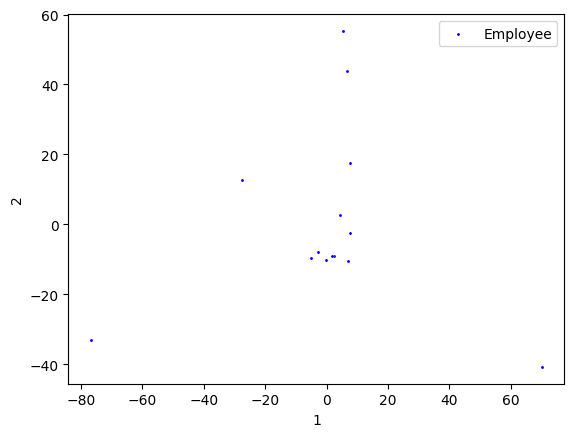

In [119]:
#Plot KMeans for data points
axes = [1,2]
seaborn.scatterplot(data=graph_df,x=axes[0],y=axes[1],s=5, color='b', label='Employee')

projected_centers = pd.DataFrame(np.array([kmeans.cluster_centers_.transpose()[axes[0]],
                                           kmeans.cluster_centers_.transpose()[axes[1]] ]).transpose())
seaborn.scatterplot(data=projected_centers,x=0, y=1, s=30, color='r',label='Group Centroid').set(
title='Employee Distribution Over Component Axes 1 and 2',
xlabel='Component 1',
ylabel='Component 2'
)

In [120]:
#Plot employee groups on key variables
x = 'OverTime'
seaborn.displot(data=df, x=x, hue='Attrition', stat='percent', palette=["teal", "crimson"],fill=True,common_norm=False).set(
title="Employee Distribution Over "+x,
    ylabel="Percent Population In Same Attrition Type"
)



ValueError: Could not interpret value `OverTime` for parameter `x`

In [126]:
#KMeans for variables
#Determine optimal number of clusters for KMeans
MAX_CLUSTERS = 30
FIRST_N_AXES = 10
inertia = []
d_inertia = []

#Columns should be variables, rows should be axes, cut rows at FIRST_N_AXES
#Scale each axis by its eigenvalue/importance
fit_sort_evecs = np.array([sort_evecs[i]*sort_evals[i] for i in range(FIRST_N_AXES)]).transpose()
for i in range(1,MAX_CLUSTERS):
    kmeans = KMeans(init="k-means++", n_clusters=i, n_init=20)
    kmeans.fit(fit_sort_evecs)
    inertia.append([i,kmeans.inertia_])
    if (i > 1):
        d_inertia.append([i, inertia[i-2][1] - inertia[i-1][1]])
    else:
        d_inertia.append([1, 0])

inertia = pd.DataFrame(inertia)
d_inertia = pd.DataFrame(d_inertia)
p = seaborn.scatterplot(data=inertia,x=0,y=1,label='Inertia', color='b')
seaborn.scatterplot(data=d_inertia,x=0,y=1,label='Relative decrease in inertia')
p.set_ylim(0,np.max(inertia[1])*1.1)
p.set_title("Inertia Against Number of Groups")
p.set_xlabel("Number of Groups")
p.set_ylabel("Inertia")
p

ValueError: Complex data not supported
[[-27.9027585 +0.j  -7.46342896+0.j  14.48876905+0.j ...   0.99051761+0.j
   -0.49829368+0.j  -1.68096016+0.j]
 [-36.42427697+0.j -12.90796248+0.j  -0.11587543+0.j ...  -3.77122647+0.j
    0.28990481+0.j   1.44403437+0.j]
 [-40.57676714+0.j  -7.7197349 +0.j   2.4221957 +0.j ...   1.17691082+0.j
    0.12320958+0.j   0.51965323+0.j]
 ...
 [ -3.11458179+0.j   2.11822536+0.j  10.73655266+0.j ...   0.18714534+0.j
    1.83100009+0.j  -1.40570047+0.j]
 [-40.57676714+0.j  -7.7197349 +0.j   2.4221957 +0.j ...   1.17691082+0.j
    0.12320958+0.j   0.51965323+0.j]
 [-36.42427697+0.j -12.90796248+0.j  -0.11587543+0.j ...  -3.77122647+0.j
    0.28990481+0.j   1.44403437+0.j]]


In [127]:
#Finalized KMeans
N_CLUSTERS = 5
kmeans = KMeans(init="k-means++", n_clusters=N_CLUSTERS, n_init=20)
kmeans.fit(fit_sort_evecs)
# kmeans.cluster_centers_

ValueError: Complex data not supported
[[-27.9027585 +0.j  -7.46342896+0.j  14.48876905+0.j ...   0.99051761+0.j
   -0.49829368+0.j  -1.68096016+0.j]
 [-36.42427697+0.j -12.90796248+0.j  -0.11587543+0.j ...  -3.77122647+0.j
    0.28990481+0.j   1.44403437+0.j]
 [-40.57676714+0.j  -7.7197349 +0.j   2.4221957 +0.j ...   1.17691082+0.j
    0.12320958+0.j   0.51965323+0.j]
 ...
 [ -3.11458179+0.j   2.11822536+0.j  10.73655266+0.j ...   0.18714534+0.j
    1.83100009+0.j  -1.40570047+0.j]
 [-40.57676714+0.j  -7.7197349 +0.j   2.4221957 +0.j ...   1.17691082+0.j
    0.12320958+0.j   0.51965323+0.j]
 [-36.42427697+0.j -12.90796248+0.j  -0.11587543+0.j ...  -3.77122647+0.j
    0.28990481+0.j   1.44403437+0.j]]


In [128]:
#Find Variable Groups
variable_labels = pd.DataFrame(np.array([normal_df.columns,kmeans.labels_]).transpose(),columns=['variable','group'])

variable_groups = []
for i in range(N_CLUSTERS):
    curr_group = []
    for j in range(len(variable_labels)):
        if (variable_labels['group'][j]==i):
            curr_group.append(variable_labels['variable'][j])
    variable_groups.append(curr_group)
variable_groups
            

AttributeError: 'KMeans' object has no attribute 'labels_'

In [129]:
len(variable_labels)

NameError: name 'variable_labels' is not defined

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

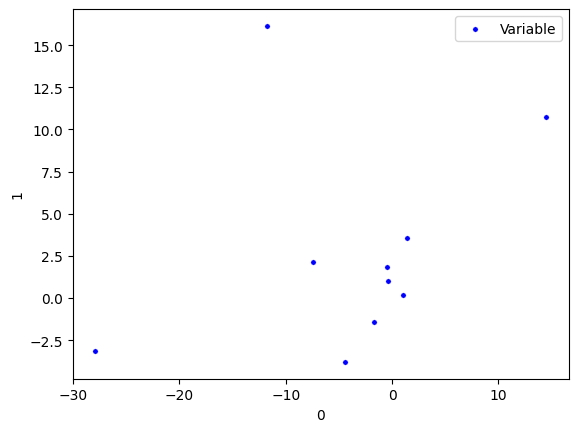

In [130]:
#Plot KMeans for variables
axes = [0,3] #Only consecutive integers!
graph_sort_evecs = pd.DataFrame(np.array([fit_sort_evecs[axes[0]],fit_sort_evecs[axes[1]]]).transpose())
seaborn.scatterplot(data=graph_sort_evecs,x=0,y=1,s=15, color='b', label="Variable")

variable_projected_centers = pd.DataFrame(np.array([kmeans.cluster_centers_.transpose()[axes[0]],
                                           kmeans.cluster_centers_.transpose()[axes[1]] ]).transpose())
seaborn.scatterplot(data=variable_projected_centers,x=0, y=1, s=30, color='r', label="Group Centroid").set(
title="Variable Grouping, Displaying Components 0 and 3",
xlabel="Component 0",
ylabel="Component 3"
)

In [131]:
graph_sort_evecs

,0,1
0,-27.902759+0.000000j,-3.114582+0.000000j
1,-7.463429+0.000000j,2.118225+0.000000j
2,14.488769+0.000000j,10.736553+0.000000j
3,-4.461112+0.000000j,-3.784789+0.000000j
4,-11.785575+0.000000j,16.139849+0.000000j
5,1.356846+0.000000j,3.550647+0.000000j
6,-0.383229+0.000000j,1.013861+0.000000j
7,0.990518+0.000000j,0.187145+0.000000j
8,-0.498294+0.000000j,1.831000+0.000000j
9,-1.680960+0.000000j,-1.405700+0.000000j


In [133]:
#Verify with sklearn PCA
principal=PCA(n_components=3)
principal.fit(normal_df)
x=principal.transform(normal_df)

In [134]:
principal.components_[2]

array([ 0.02154925, -0.00017234,  0.00360255, ...,  0.01596855,
        0.00360255, -0.00017234])

In [135]:
sort_evecs[2]

array([ 0.02154925+0.j, -0.00017234+0.j,  0.00360255+0.j, ...,
        0.01596855+0.j,  0.00360255+0.j, -0.00017234+0.j])

In [136]:
evecs[1]

array([-0.00817929+0.j, -0.01414604+0.j, -0.00846018+0.j, ...,
        0.0023214 +0.j, -0.00846018+0.j, -0.01414604+0.j])

In [137]:
principal.explained_variance_ratio_/0.16802437*4.704682

array([12.69807707,  3.6499157 ,  2.68942462])

In [138]:
sort_evals

array([ 3.17451951e+03+0.00000000e+00j,  9.12478996e+02+0.00000000e+00j,
        6.72356205e+02+0.00000000e+00j, ...,
       -2.64596933e-13-3.07129290e-13j, -3.77934275e-13+1.10224265e-13j,
       -3.77934275e-13-1.10224265e-13j])